In [ ]:
import torchvision
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image
matrix = Image.open("matrix.png")
to_tensor = torchvision.transforms.ToTensor()
matrix_tensor = to_tensor(matrix)

'''
Observe the 4 color channels. RGBɑ where ɑ is the measure of transparency of each pixel.
'''

print(matrix_tensor.shape)

torch.Size([4, 1050, 1680])


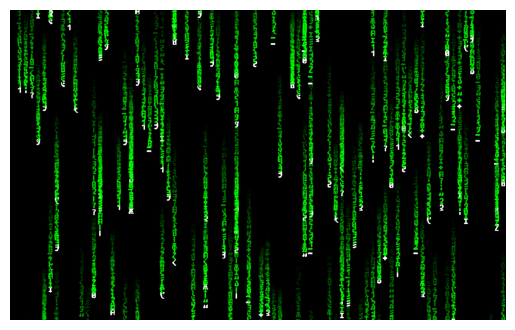

In [ ]:
plt.imshow(matrix_tensor.permute(1, 2, 0))
plt.axis(False)
plt.show()

In [ ]:
evil_laugh = Image.open("evil-laugh-gif.gif")
evil_laugh_tensor = to_tensor(evil_laugh)
evil_laugh_tensor = evil_laugh_tensor.permute(1, 2, 0)
print(evil_laugh_tensor.shape)

torch.Size([331, 498, 1])


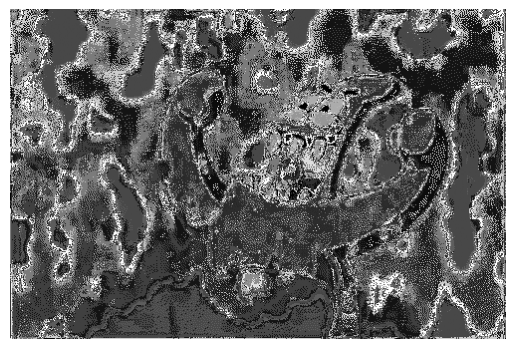

In [ ]:
'''
Observe there is only one color channel! Gif stores colors based on a pallete.
The colors in this pallete have indices from 0 to 255. We have to convert this
RGB before we can see the colors. Else imshow will treat the tensor as a
greyscale image!
'''
plt.imshow(evil_laugh_tensor, cmap="gray")
plt.axis(False)
plt.show()


torch.Size([331, 498, 3])


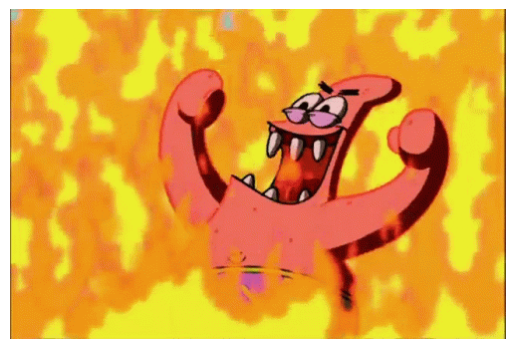

In [ ]:
'''
Now observe how the number of color channels have changed to 3.
'''
evil_laugh_rgb = evil_laugh.convert("RGB")
evil_laugh_rgb = to_tensor(evil_laugh_rgb).permute(1, 2, 0)
print(evil_laugh_rgb.shape)
plt.imshow(evil_laugh_rgb)
plt.axis(False)
plt.show()

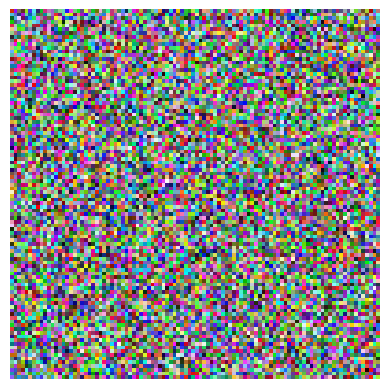

In [ ]:
import torch
random_idx = torch.rand(size=[100, 100, 3])
plt.imshow(random_idx)
plt.axis(False)
plt.show()

In [ ]:
from torchvision.datasets import CIFAR100
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
train_data = CIFAR100(root="data",
                      train=True,
                      download=True,
                      transform=ToTensor())

test_data = CIFAR100(root="data",
                      train=False,
                      download=True,
                      transform=ToTensor())

100%|██████████| 169M/169M [00:04<00:00, 34.0MB/s]


In [ ]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle=True)

In [ ]:
class_names = train_data.classes

In [ ]:
batch_image, label = next(iter(train_dataloader))

In [ ]:
def TransformationFunc(transformation: torchvision.transforms,
                       image: torch.Tensor,
                       label: str):

  plt.axis(False)
  plt.title(label)
  plt.imshow(transformation(image).permute(1, 2, 0))
  plt.show()

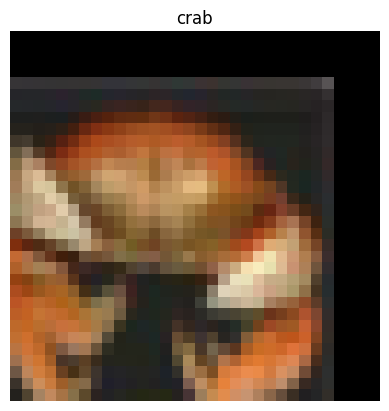

In [ ]:
# Important data pipelining transformation

"""
RandomCrop:
  This randomly focuses onto a particular part of the image and crops it. This is
  to ensure that the model doesn't memorize pixel patterns. First, the image is
  padded with 4 pixels and then a random crop window is used to crop the image.
  This is to ensure that the model doesn't memorize pixel patterns. And yes,
  the image will include dark padding regions.
"""

TransformationFunc(transformation=transforms.RandomCrop(size=32, padding=4),
                   image=batch_image[3],
                   label=class_names[label[3]])

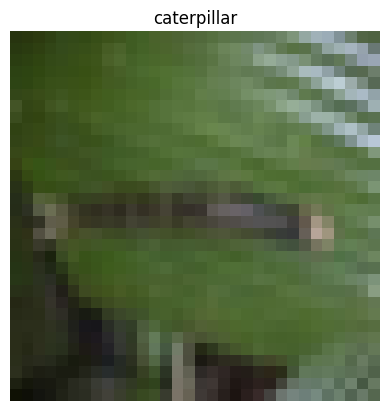

In [ ]:
"""
RandomHorizontalFlip
Mirrors the image left <-> right probabilistically.
"""

TransformationFunc(transformation=transforms.RandomHorizontalFlip(p=0.5),
                   image=batch_image[5],
                   label=class_names[label[5]])

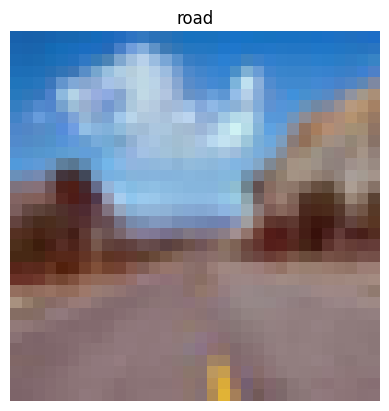

In [ ]:
"""
ColorJitter
Messes with the brightness, contrast, saturation, hue part of the image
"""
TransformationFunc(transformation=transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.02),
                   image=batch_image[13],
                   label=class_names[label[13]])

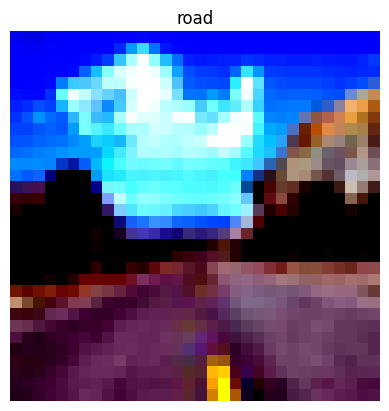

In [ ]:
"""
Normalize
Used to make the mean close to 0 and the variance 1. It done so that the
model's input isnt skewed but smooth. It is done to ensure that the model's
learning curve isnt rough.
"""

CIFAR100_MEAN = (0.5071, 0.4867, 0.4408)
CIFAR100_STD = (0.2675, 0.2565, 0.2761)

TransformationFunc(transformation=transforms.Normalize(CIFAR100_MEAN, CIFAR100_STD),
                   image=batch_image[13],
                   label=class_names[label[13]])